In [6]:
#Cargamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
from datetime import datetime, timedelta
import matplotlib.cm as cm 

n_fish=6
#Definimos parametros
data_folder = '/Volumes/Expansion/Datos G. omarorum/FB-DOE/' #Cambiar ruta a la carpeta donde estan los archivos .pkl (obtenidos de EOD_analysis)
os.chdir(data_folder)

In [7]:
files = sorted(glob.glob('*pkl'))
files

['fish1_FB-DOE.pkl',
 'fish2_FB-DOE.pkl',
 'fish3_FB-DOE.pkl',
 'fish4_FB-DOE.pkl',
 'fish5_FB-DOE.pkl',
 'fish6_FB-DOE.pkl']

In [8]:
medians = pd.DataFrame(np.zeros(shape=(55, len(files))), columns=files)
times = pd.DataFrame(np.zeros(shape=(55,len(files))), columns=files)

In [21]:
for j in range(len(files)):
    with open(files[j], 'rb') as file:  
        FB_doe = pickle.load(file)
    
    midnight = datetime.strptime(list(FB_doe['FB-DOE'].keys())[0][:-1], '%Y-%m-%dT%H_%M_%S').replace(hour=0, minute=0, second=0, microsecond=0)
    i=0
    for key in FB_doe['FB-DOE'].keys():
        
        medians.iloc[i,j] = np.median(FB_doe['FB-DOE'][key])
        time = datetime.strptime(key[:-1], '%Y-%m-%dT%H_%M_%S')
        times.iloc[i,j] =  abs(midnight - time).total_seconds()
        i+=1

times.replace(0, np.nan, inplace=True)

In [22]:
times

,fish1_FB-DOE.pkl,fish2_FB-DOE.pkl,fish3_FB-DOE.pkl,fish4_FB-DOE.pkl,fish5_FB-DOE.pkl,fish6_FB-DOE.pkl
0,61370.0,61082.0,61371.0,66755.0,61627.0,61271.0
1,62570.0,62282.0,62571.0,67955.0,62827.0,62472.0
2,63770.0,63482.0,63771.0,69155.0,64027.0,63672.0
3,64970.0,64682.0,64971.0,70355.0,65227.0,64872.0
4,66171.0,65883.0,66171.0,71555.0,66427.0,66072.0
5,67371.0,67083.0,67372.0,72755.0,67628.0,67272.0
6,68571.0,68283.0,68572.0,73956.0,68828.0,68472.0
7,69771.0,69483.0,69772.0,75156.0,70028.0,69672.0
8,70971.0,70683.0,70972.0,76356.0,71228.0,70873.0
9,72171.0,71883.0,72172.0,77556.0,72428.0,72073.0


In [25]:
pop_median = np.median(medians, axis=1)


In [26]:
x_axis_lab = ['17 hs', '19 hs', '21 hs', '23 hs', '01 hs', '03 hs', '05 hs', '07 hs', '09 hs', '11 hs']
x_axis_val = [61200, 68400, 75600, 82800, 90000, 97200, 104400, 111600, 118800, 126000]

/var/folders/dk/0fvz37fn27l9149spycxsyf80000gp/T/ipykernel_29553/3548154407.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Pastel1')


Text(0, 0.5, 'FB-DOE (Hz)')

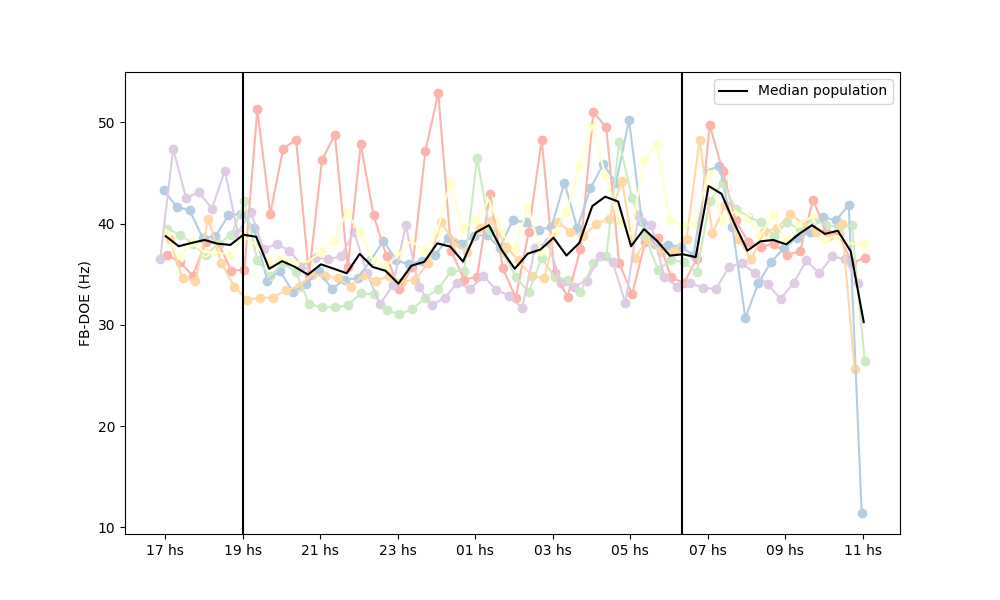

In [29]:
%matplotlib widget

night = abs(midnight - midnight.replace(hour=19, minute=0, second=0)).total_seconds()

colormap = cm.get_cmap('Pastel1')
colors = [colormap(i) for i in range(n_fish)]

plt.figure(figsize=(10, 6))
i=0
for column in times.columns:
    plt.plot(sorted(times[column]), medians[column], color=colors[i])
    plt.scatter(sorted(times[column]), medians[column],color=colors[i])
    i+=1

plt.plot(sorted(times[column]), pop_median, color='black', label='Median population')
plt.xticks(x_axis_val, x_axis_lab)
plt.axvline(x=night, color='black', linestyle='-')
plt.axvline(x=109200, color='black', linestyle='-')
plt.legend()
plt.ylabel('FB-DOE (Hz)')
